# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

from lisc import Words
from lisc.data import Articles, ArticlesAll
from lisc.utils import SCDB, load_object
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values

## Setup

In [2]:
# Settings
SAVE_FIG = False

In [3]:
# Set the file locations
term_dir = '../terms/'
db = SCDB('../data/')

# Set the name of the file to load
name = 'test' # 'erps', 'test'

In [4]:
# Load the words object
words = load_object('words_' + name, directory=db)

### Check Database Information

In [5]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210122-2212m.3',
 'count': '32050929',
 'lastupdate': '2021/01/23 15:24'}

In [6]:
# Check requester object info
words.meta_data.requester

{'n_requests': 5,
 'wait_time': 0.3333333333333333,
 'start_time': '20:25:42 Sunday 24 January 2021',
 'end_time': '20:25:46 Sunday 24 January 2021',
 'logging': None}

## Data Organization

In [7]:
# Check if data not loaded, and reload if so
for erp in words.labels:
    if not words[erp].n_articles:
        words[erp].load(directory=db)

In [8]:
# Collect ERPs into list of aggragated data objects
all_data = [ArticlesAll(words[erp]) for erp in words.labels]

### Check Number of Articles

In [9]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 2


In [10]:
# Check the total number of articles in the collected dataset
total_article_count = sum([data.n_articles for data in all_data])
print('Number of papers: \t', total_article_count)

Number of papers: 	 10


In [11]:
# Collet all the DOIs across all papers
dois = get_all_values(all_data, 'dois', unique=True)

In [12]:
# Check the number of unique papers, based on DOIs
print('Number of unique DOIs: \t', len(set(dois)))

Number of unique DOIs: 	 9


### Collect information across all ERPs & papers

In [13]:
# Get global counts of authors and journals
all_authors = get_all_counts(all_data, 'authors', combine=True)
all_journals = get_all_counts(all_data, 'journals', combine=True)

In [14]:
# Check the most common authors
all_authors.most_common(2)

[(('Zsoldos', 'I'), 2), (('Sinding', 'C'), 2)]

In [15]:
# Check the most common journals
all_journals.most_common(2)

[('Neuroscience', 2), ('Animals : an open access journal from MDPI', 1)]

## Check Words

In [16]:
# Check most common words
for data in all_data:
    data.check_frequencies(n_check=5)

P100  : patients , stimuli , emotional , perception , groups
N100  : ap , curing , pictures , tens , binder


In [17]:
# Check most common keywords
for data in all_data:
    data.check_frequencies('keywords', n_check=5)

P100  : event-related potentials , eeg , food , obesity , odor
N100  : eeg , event-related potentials , food , obesity , odor


### Summaries

In [18]:
# Check an example summary
ind = 0
all_data[ind].create_summary()
all_data[ind].print_summary()

P100 :
  Number of articles: 		 5
  First publication: 		 2021
  Most common author: 		 Zsoldos I
    number of publications: 	 1
  Most common journal: 		 Neuroscience
    number of publications: 	 1 



### WordCloud Plots

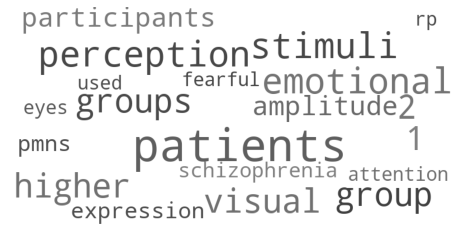

In [19]:
# Create a wordcloud
plot_wordcloud(all_data[ind].words, 20)

### Data Plots

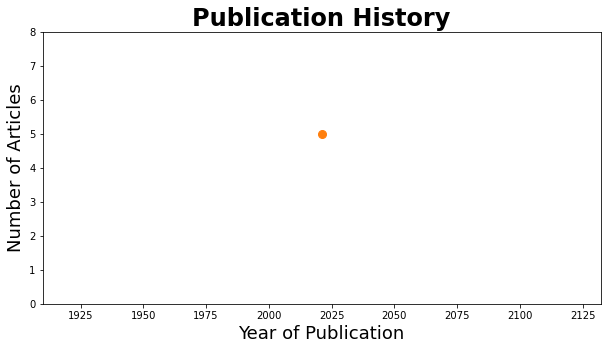

In [20]:
# Check an example history plot
plot_years(all_data[ind].years)